# Statistical Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## 1a. Descriptive analysis of additives.

In [2]:
df = pd.read_csv("ingredient.csv")
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
b,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
c,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
d,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
e,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
f,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
g,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
h,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
i,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [5]:
# correlation matrix of the additives
corr = df.corr(method="pearson")
corr

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


Parametric Statistical Hypothesis Tests, using Analysis of Variance (ANOVA)

Test whether the means of the additives are significantly
different.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretations:
* Null hypothesis, H0: the means of the additives are all equal.
* Alternative hypothesis, H1: one or more additive means are not equal.

In [6]:
stat, p = stats.f_oneway(*[df[col].values for col in df.columns])
pprint(f"stat: {stat:.3f}, p: {p:.3f}.")
pprint(f"Distribution is probably the same, (fail to reject H0).") if p > 0.05 else pprint(f"Distribution is probably different, (reject H0).")

'stat: 168331.969, p: 0.000.'
'Distribution is probably different, (reject H0).'


## Conclusion

It appears from the obtained p value that their is a significant difference
between different additives. 

## 1b. A graphical analysis of the additives, including a distribution study.

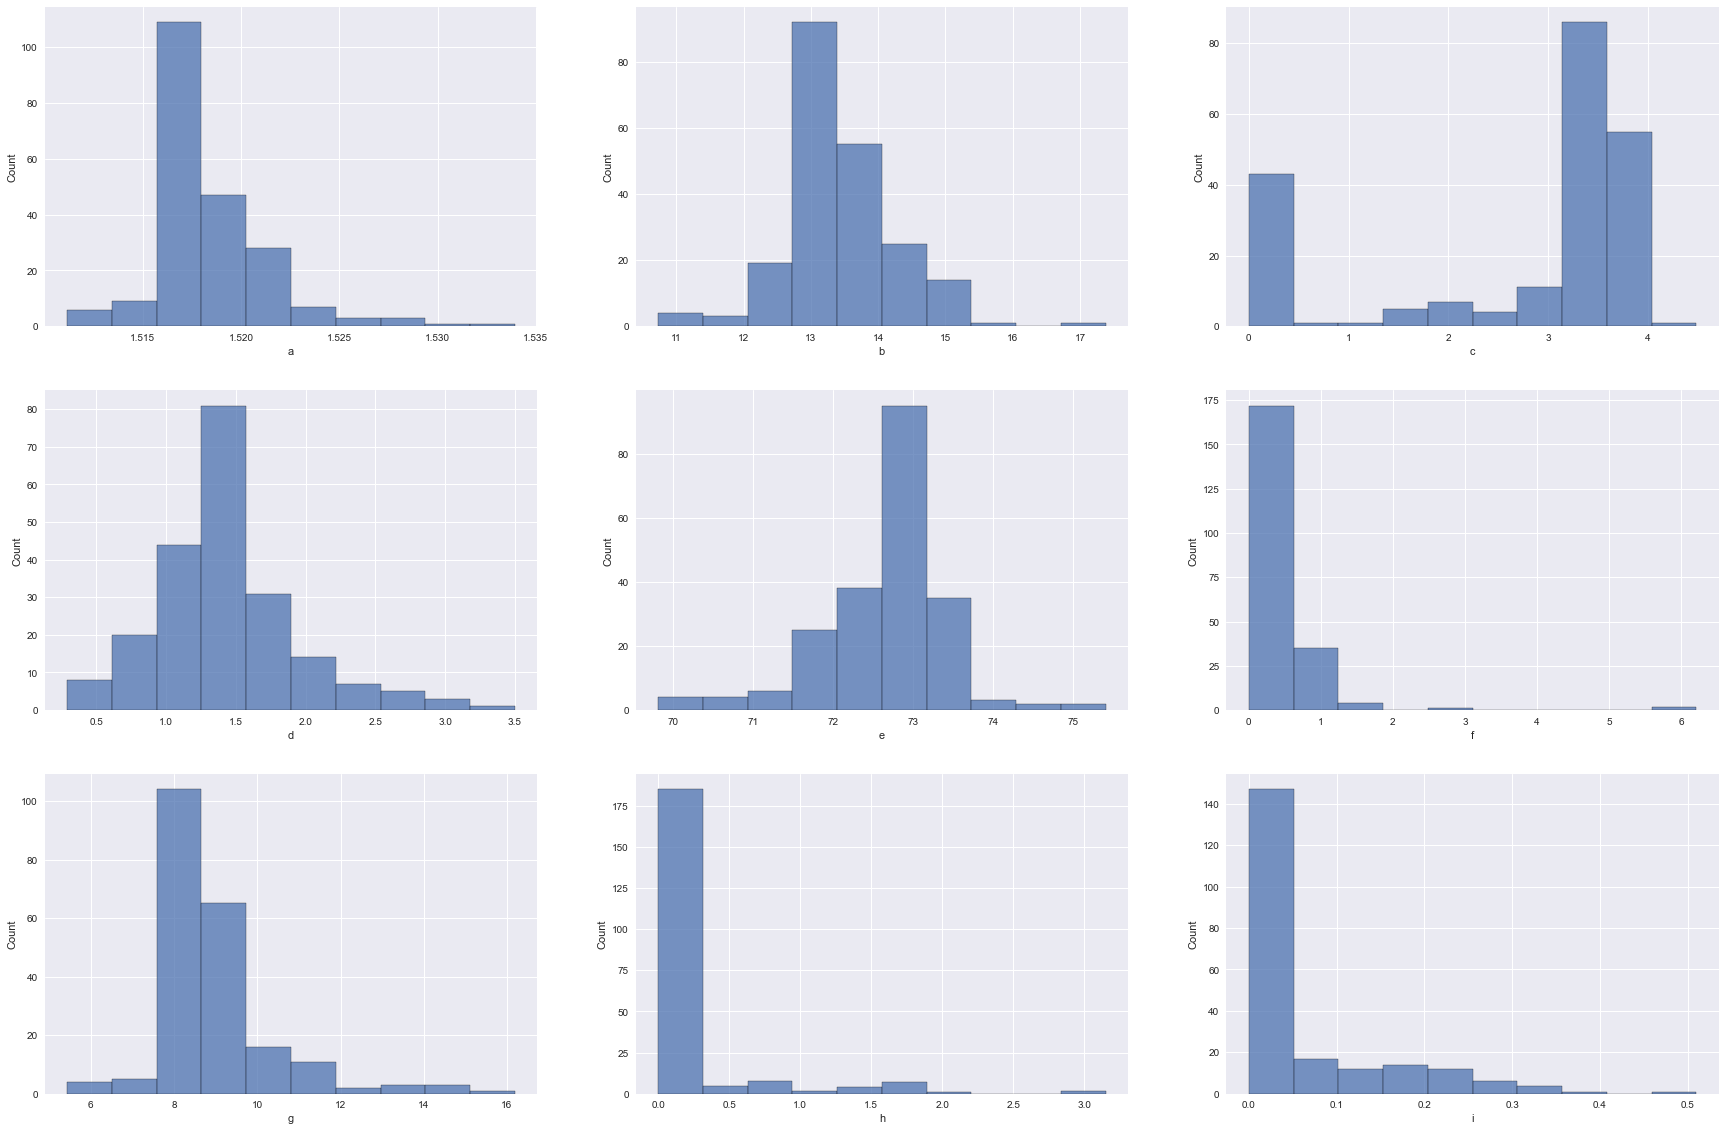

In [7]:
# visual normality check
plt.figure(figsize=(30, 20))
for idx, col in enumerate(df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(df, x=col, bins=10)
plt.show()

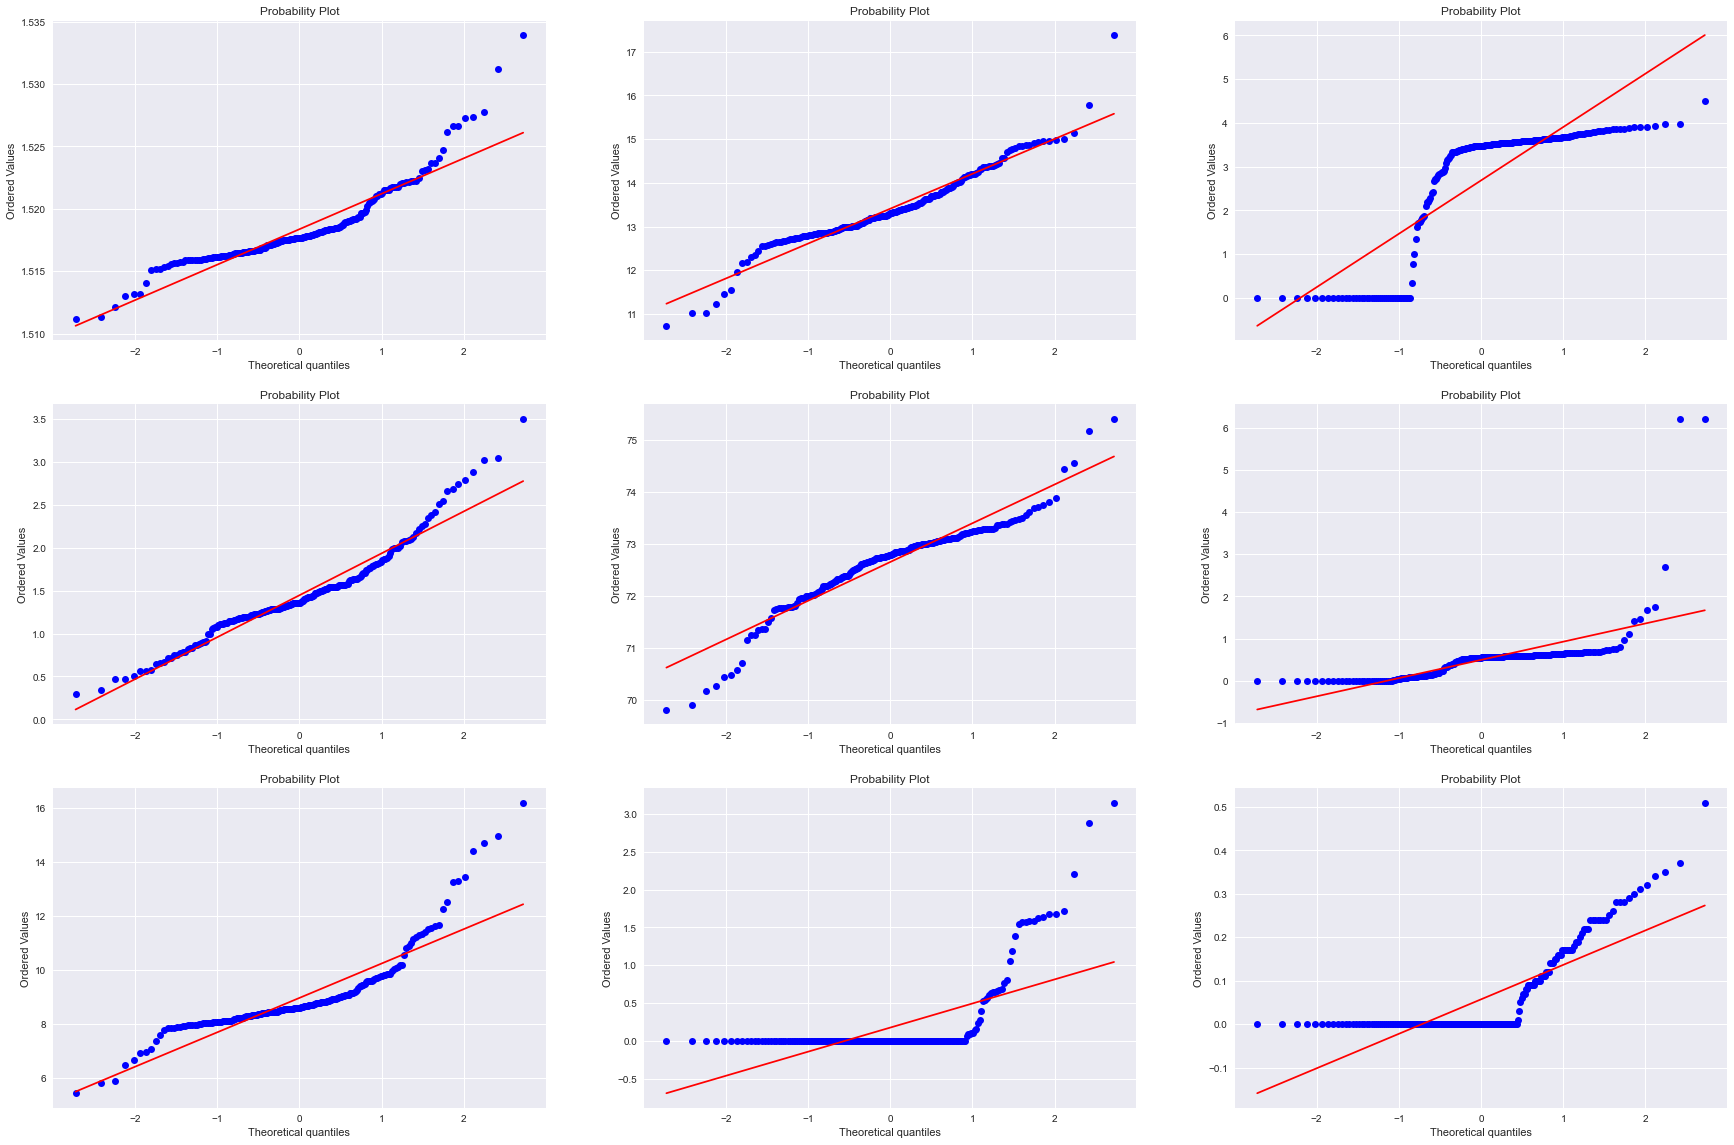

In [8]:
# qq plot
plt.figure(figsize=(30, 20))
for idx, col in enumerate(df.columns, start=1):
    plt.subplot(3, 3, idx)
    stats.probplot(df[col], dist="norm", plot=plt)

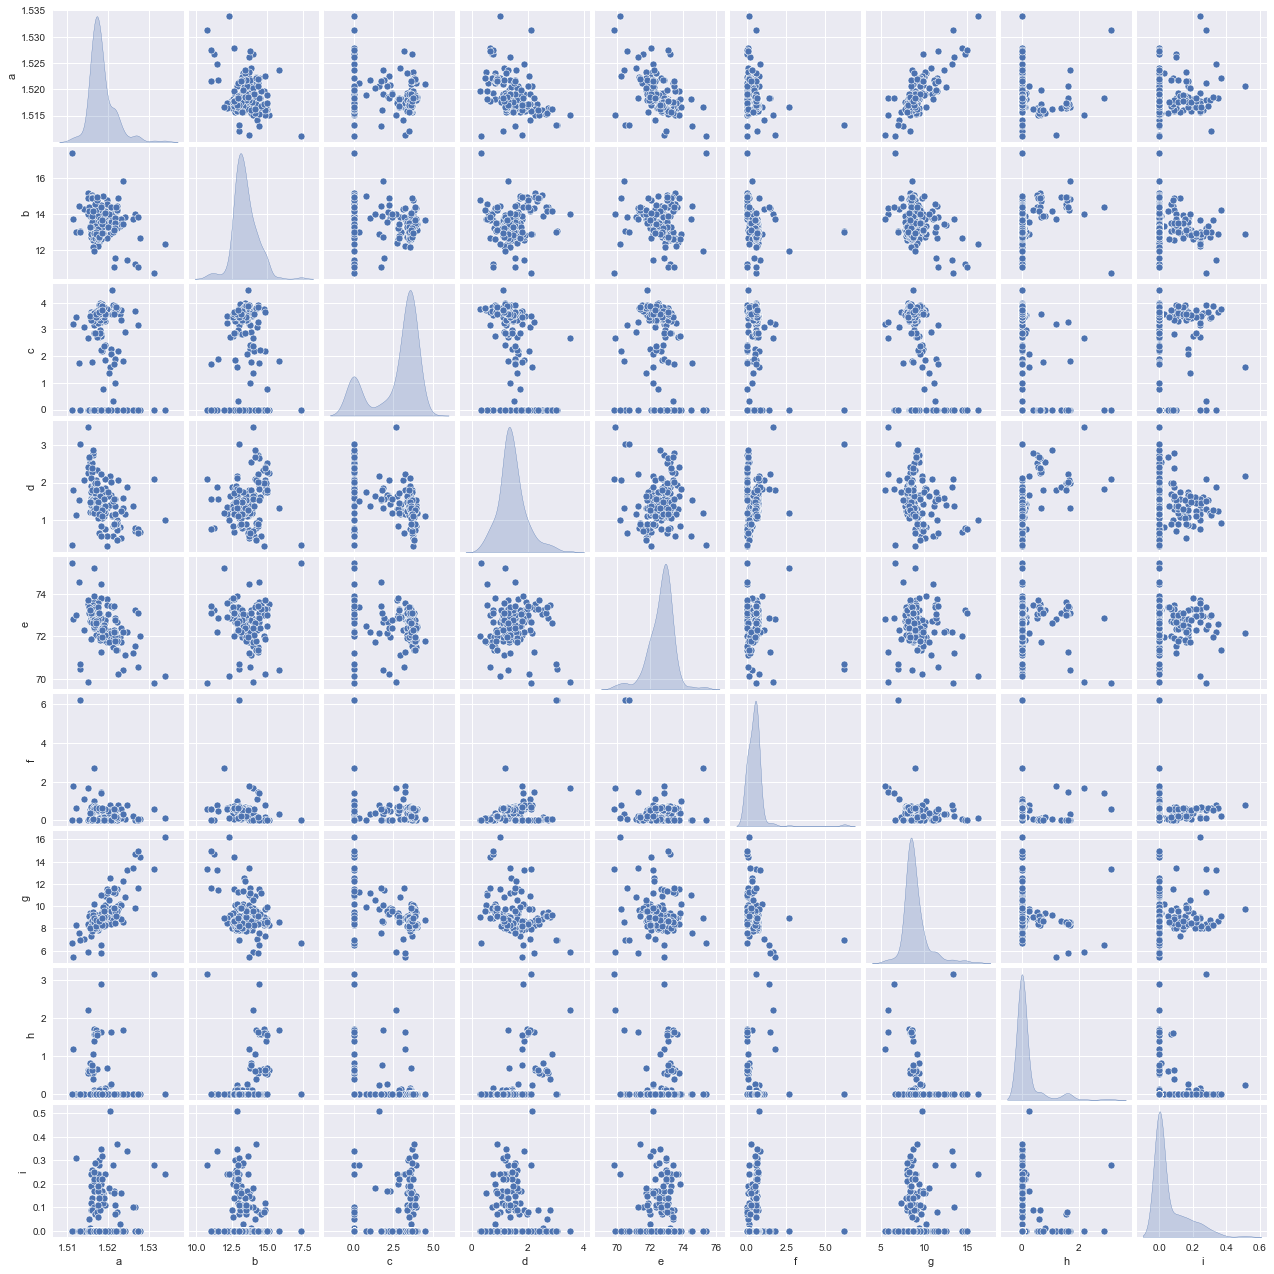

In [9]:
# pairwise relationship plot
sns.pairplot(df, diag_kind="kde",height=2.0)

In [10]:
# Shapiro test
for col in df.columns:
    stat, p = stats.shapiro(df[col].values)
    print(f"Column {col} --> stat: {stat:.3f}, p: {p:.3f}.", end=" ")
    print(f"Probably Gaussian, (fail to reject H0).") if p < 0.05 else print(f"Probably not Gaussian, (reject H0).")

Column a --> stat: 0.868, p: 0.000. Probably Gaussian, (fail to reject H0).
Column b --> stat: 0.946, p: 0.000. Probably Gaussian, (fail to reject H0).
Column c --> stat: 0.699, p: 0.000. Probably Gaussian, (fail to reject H0).
Column d --> stat: 0.943, p: 0.000. Probably Gaussian, (fail to reject H0).
Column e --> stat: 0.920, p: 0.000. Probably Gaussian, (fail to reject H0).
Column f --> stat: 0.442, p: 0.000. Probably Gaussian, (fail to reject H0).
Column g --> stat: 0.794, p: 0.000. Probably Gaussian, (fail to reject H0).
Column h --> stat: 0.409, p: 0.000. Probably Gaussian, (fail to reject H0).
Column i --> stat: 0.653, p: 0.000. Probably Gaussian, (fail to reject H0).


In [11]:
# K^2 test
for col in df.columns:
    stat, p = stats.normaltest(df[col].values)
    print(f"Column {col} --> stat: {stat:.3f}, p: {p:.3f}.", end=" ")
    print(f"Probably Gaussian, (fail to reject H0).") if p < 0.05 else print(f"Probably not Gaussian, (reject H0).")

Column a --> stat: 84.358, p: 0.000. Probably Gaussian, (fail to reject H0).
Column b --> stat: 27.015, p: 0.000. Probably Gaussian, (fail to reject H0).
Column c --> stat: 35.885, p: 0.000. Probably Gaussian, (fail to reject H0).
Column d --> stat: 36.773, p: 0.000. Probably Gaussian, (fail to reject H0).
Column e --> stat: 35.873, p: 0.000. Probably Gaussian, (fail to reject H0).
Column f --> stat: 305.666, p: 0.000. Probably Gaussian, (fail to reject H0).
Column g --> stat: 109.473, p: 0.000. Probably Gaussian, (fail to reject H0).
Column h --> stat: 177.280, p: 0.000. Probably Gaussian, (fail to reject H0).
Column i --> stat: 76.867, p: 0.000. Probably Gaussian, (fail to reject H0).


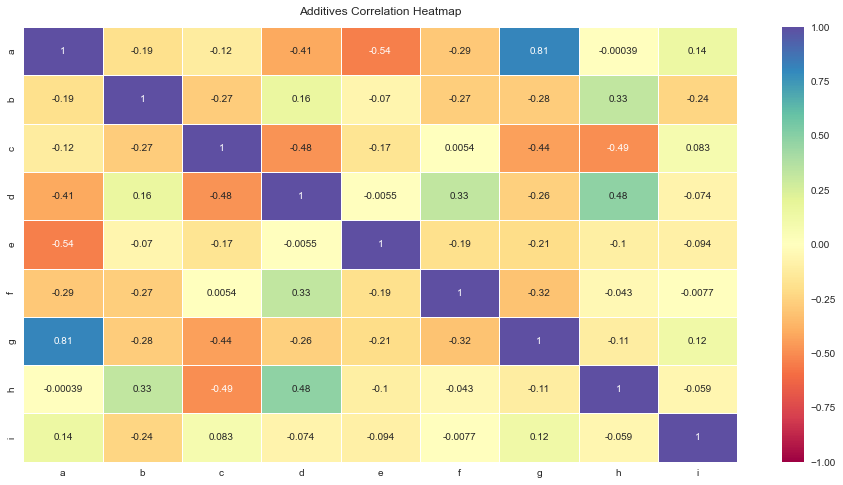

In [12]:
# correlation heatmap
plt.figure(figsize=(16, 8))
corr = df.corr(method="pearson")
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap="Spectral");
heatmap.set_title('Additives Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

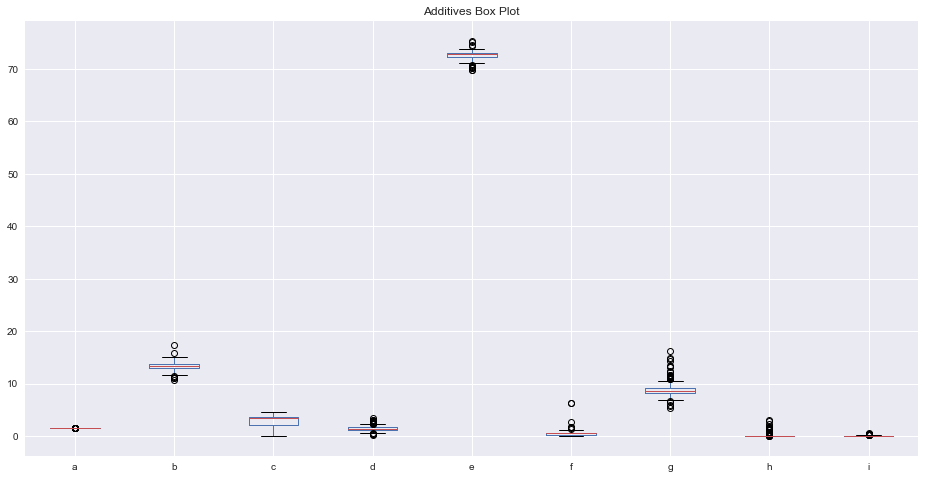

In [13]:
# box plot
plt.figure(figsize=(16, 8))
boxplot = df.boxplot()
plt.title("Additives Box Plot")
plt.show()

## conclusion

* 

## 1c. Determine the distinctive number of formulations present in the dataset via unsupervised learning (Clustering)

In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [15]:
kmeans_config = {"init": "random", "n_init": 10, "max_iter": 500, "random_state": 42}

In [16]:
# determine number of clusters (elbow method)
kmeans_per_k = [KMeans(n_clusters=k, **kmeans_config).fit(scaled_data) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [17]:
kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
print(f"Best number of clusters: {kl.elbow}.")

Best number of clusters: 3.


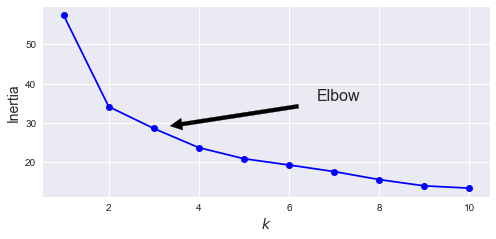

In [18]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', 
            xy=(kl.elbow, kl.elbow_y),
            xytext=(0.55, 0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [19]:
# determine the number of clusters (silhouette method)
silhouette_scores = [silhouette_score(scaled_data, model.labels_) for model in kmeans_per_k[1:]]

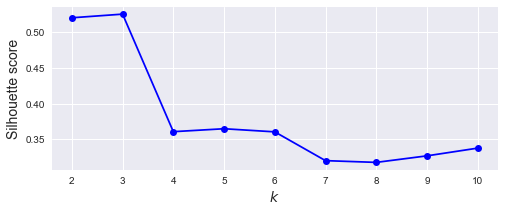

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [21]:
# kmeans clustering with best cluster size (3)
kmeans = KMeans(n_clusters=3, 
                init='k-means++',
                max_iter=300, 
                n_init=10, 
                random_state=0
                )
y_pred = kmeans.fit_predict(scaled_data)


In [22]:
pprint(f"Number of clusters in training data: {len(np.unique(y_pred))}.")

'Number of clusters in training data: 3.'


In [23]:
pred_df = df.copy()
pred_df["preds"] = pd.DataFrame(y_pred)
pprint(pred_df["preds"].value_counts())

0    161
1     33
2     20
Name: preds, dtype: int64


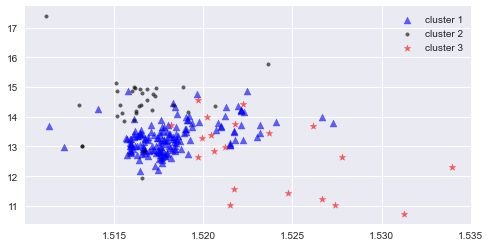

In [24]:
# plot the clusters
plt.figure(figsize=(8, 4))
plt.scatter(pred_df.iloc[y_pred ==0, 0], pred_df.iloc[y_pred ==0, 1],
            marker='^', s=50, color="b", alpha=0.6, label="cluster 1")

plt.scatter(pred_df.iloc[y_pred ==1, 0], pred_df.iloc[y_pred ==1, 1],
            marker='.', s=50, color="k", alpha=0.6, label="cluster 2")

plt.scatter(pred_df.iloc[y_pred ==2, 0], pred_df.iloc[y_pred ==2, 1],
            marker='*', s=50, color="r",alpha=0.6, label="cluster 3")

plt.legend(loc="best")
plt.show()

## Conclusion

There are three distinct clusters in the dataset.